# Evaluation

In this section the ML models that have been trained in the notebook "Training_ML_Models" will be evaluated with the help of a confusion matrix, f1 score, accurancy, precision, recall and a ROC curve.

For our use case, achieving a high recall is more important than high precision. This is because we want to minimize the number of students who would actually drop out but are incorrectly predicted to graduate (false negatives). By doing so, we can ensure that students who are at risk of dropping out receive the necessary support for their studies.

However, in order to have a complete evaluation of the models we will include both metrics but take a closer look at the meaning of the recall score.

## Imports

In [2]:
import importnb
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from scipy.stats import norm
import pandas as pd

In [29]:
with importnb.Notebook():
    from Data_Cleanup import df_filtered
    from Training_ML_Models import X_test, y_test, y_pred_knn, y_pred_knn_tuned, y_pred_rf, y_pred_rf_tuned, y_pred_dt, y_pred_dt_tuned, y_pred_gb, model_knn, model_knn_tuned, model_rf, model_rf_tuned, model_dt, model_dt_tuned, model_gb

df_filtered.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,17,5,1,1,19,127.3,1,0,1,...,0,0,0,0.000000,0,0,0,0.000000,1.74,0
1,1,15,1,1,1,1,142.5,1,0,0,...,6,6,6,14.000000,6,6,6,13.666667,0.79,1
2,1,1,5,1,1,37,124.8,1,0,0,...,6,0,0,0.000000,6,0,0,0.000000,1.74,0
3,1,17,2,1,1,38,119.6,1,0,1,...,6,8,6,13.428571,6,10,5,12.400000,-3.12,1
4,2,39,1,0,1,37,141.5,0,0,1,...,6,9,5,12.333333,6,6,6,13.000000,0.79,1


## 1. kNN

### 1.1 Evaluation of Untuned Model

In [4]:
accuracy_model_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f'Accuracy: {accuracy_model_knn}')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('Classification Report:')
print(class_report_knn)

Accuracy: 0.8751147842056933
Confusion Matrix:
[[326 107]
 [ 29 627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       433
           1       0.85      0.96      0.90       656

    accuracy                           0.88      1089
   macro avg       0.89      0.85      0.86      1089
weighted avg       0.88      0.88      0.87      1089



The precision for class 0 (Dropout) is 92%, but the recall is 75%. This means that students that have the risk of dropping out, 75% were correctly identified.

The precison for class 1 (Graduate) is 85%, but the recall is 96%. This means that students that do not have the the risk off dropping out, 96% were correctly identified. 

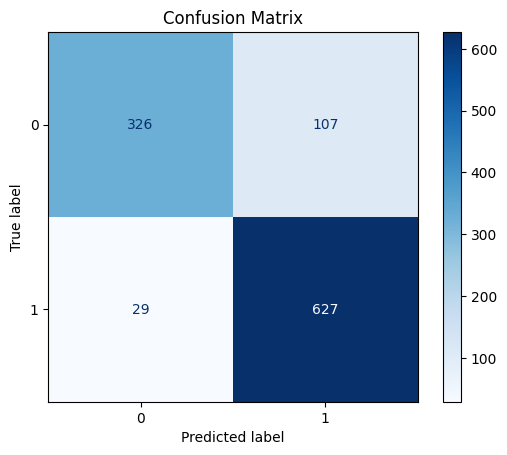

In [5]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

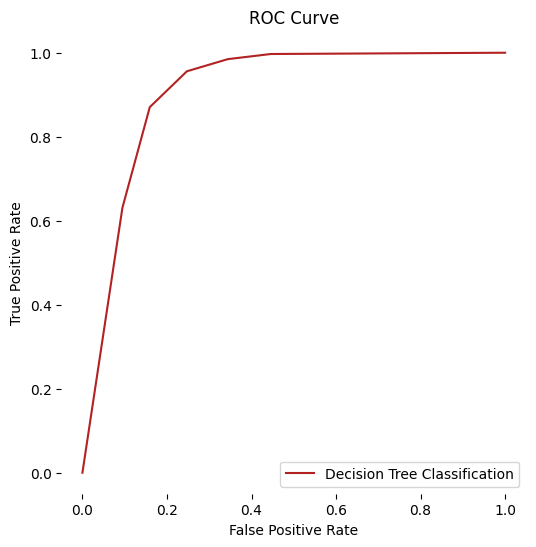

In [6]:
y_pred_probabiblity_knn = model_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_knn)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

In [7]:
auc_untuned_knn = metrics.roc_auc_score(y_test,  y_pred_probabiblity_knn)
print(auc_untuned_knn)

0.906790401622261


### 1.2 Evaluation of Tuned Model

In [8]:
accuracy_model_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
conf_matrix_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
class_report_knn_tuned = classification_report(y_test, y_pred_knn_tuned)

print(f'Accuracy: {accuracy_model_knn_tuned}')
print('Confusion Matrix:')
print(conf_matrix_knn_tuned)
print('Classification Report:')
print(class_report_knn_tuned)

Accuracy: 0.8861340679522498
Confusion Matrix:
[[327 106]
 [ 18 638]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       433
           1       0.86      0.97      0.91       656

    accuracy                           0.89      1089
   macro avg       0.90      0.86      0.88      1089
weighted avg       0.89      0.89      0.88      1089



The precision for class 0 (Dropout) is 95%, but the recall is 76%. This means that students that have the risk of dropping out, 76% were correctly identified.

The precison for class 1 (Graduate) is 86%, but the recall is 97%. This means that students that do not have the the risk off dropping out, 97% were correctly identified. 

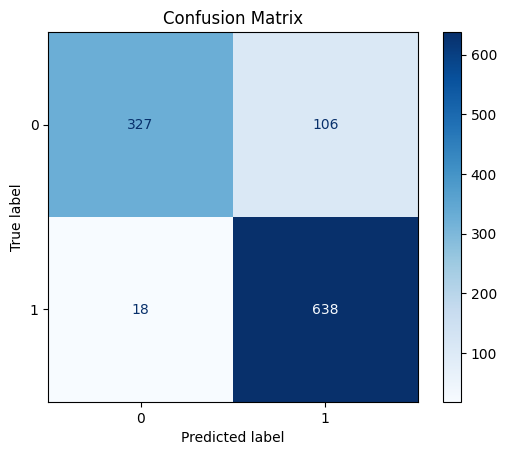

In [9]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn_tuned).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

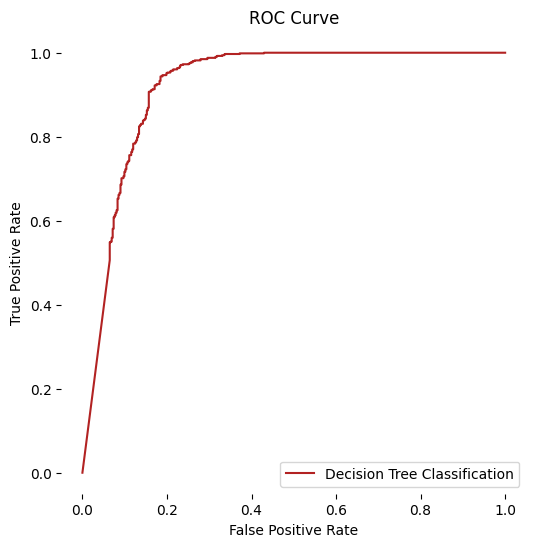

In [10]:
y_pred_probabiblity_knn_tuned = model_knn_tuned.predict_proba(X_test)[:,1]
fpr_tuned, tpr_tuned, thresholds_tuned = metrics.roc_curve(y_test,  y_pred_probabiblity_knn_tuned)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr_tuned, tpr_tuned, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

In [30]:
auc_tuned_knn = metrics.roc_auc_score(y_test,  y_pred_probabiblity_knn_tuned)
print(auc_tuned_knn)

0.9207281867853321


The tuned kNN model performed better with an accurancy of 0.886 compared to the untuned model with an accurancy of 0.875. Also the recall score of the tuned model for both classes is higher as well as the AUC score.

## 2. Random Forest

### 2.1 Evaluation of Untuned Model

In [11]:
accurancy_model_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accurancy_model_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

Accuracy: 0.9008264462809917
Confusion Matrix:
[[361  72]
 [ 36 620]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       433
           1       0.90      0.95      0.92       656

    accuracy                           0.90      1089
   macro avg       0.90      0.89      0.89      1089
weighted avg       0.90      0.90      0.90      1089



The precision for class 0 (Dropout) is 91%, but the recall is 83%. This means that students that have the risk of dropping out, 83% were correctly identified.

The precison for class 1 (Graduate) is 90%, but the recall is 95%. This means that students that do not have the the risk off dropping out, 95% were correctly identified. 

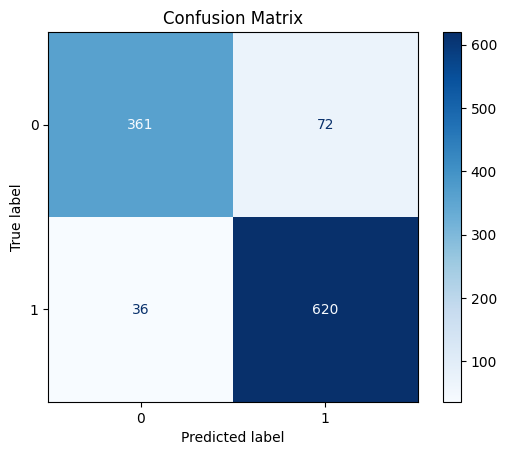

In [12]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

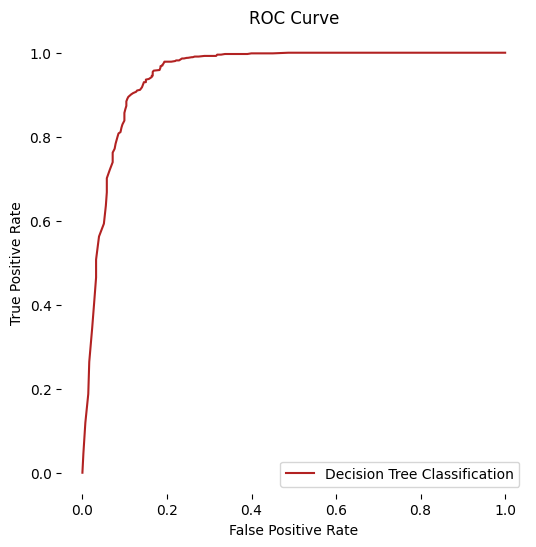

In [13]:
y_pred_probabiblity_rf = model_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_rf)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

In [32]:
auc_untuned_random_forest = metrics.roc_auc_score(y_test,  y_pred_probabiblity_rf)
print(auc_untuned_random_forest)

0.9466674646538613


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


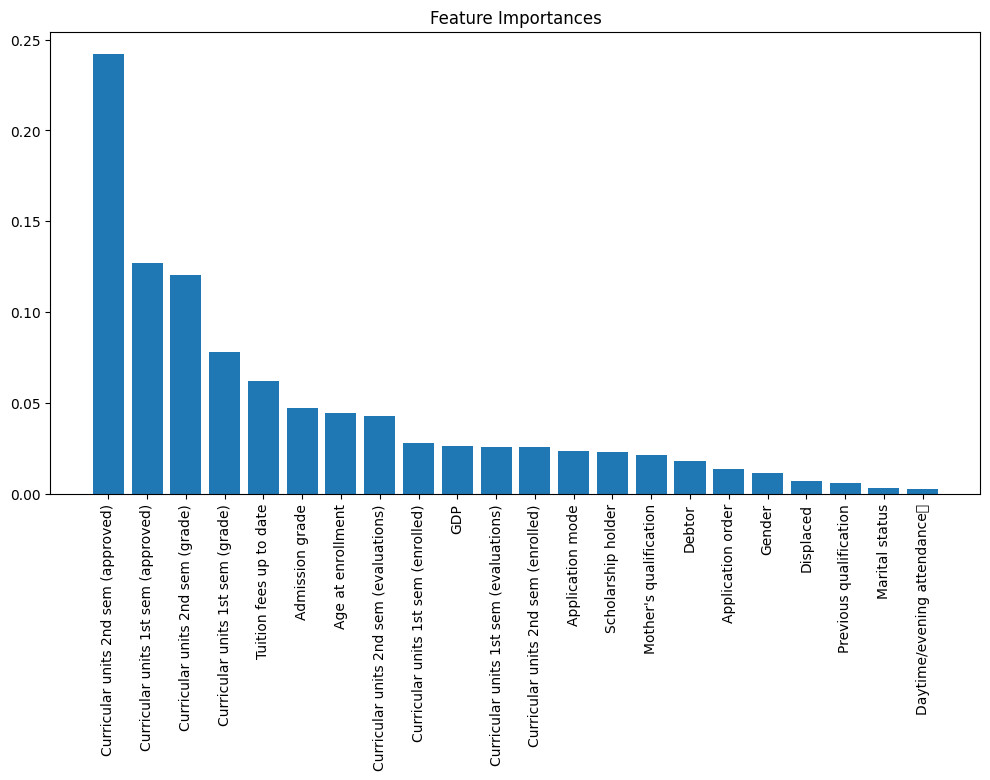

In [14]:
feature_importances = model_rf.feature_importances_
features = df_filtered.columns[:-1]

indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), feature_importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.show()

### 2.2 Evaluation of Tuned Model

In [15]:
accurancy_model_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
class_report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

print(f'Accuracy: {accurancy_model_rf_tuned}')
print('Confusion Matrix:')
print(conf_matrix_rf_tuned)
print('Classification Report:')
print(class_report_rf_tuned)

Accuracy: 0.8925619834710744
Confusion Matrix:
[[345  88]
 [ 29 627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       433
           1       0.88      0.96      0.91       656

    accuracy                           0.89      1089
   macro avg       0.90      0.88      0.88      1089
weighted avg       0.90      0.89      0.89      1089



The precision for class 0 (Dropout) is 92%, but the recall is 80%. This means that students that have the risk of dropping out, 80% were correctly identified.

The precison for class 1 (Graduate) is 88%, but the recall is 96%. This means that students that do not have the the risk off dropping out, 96% were correctly identified. 

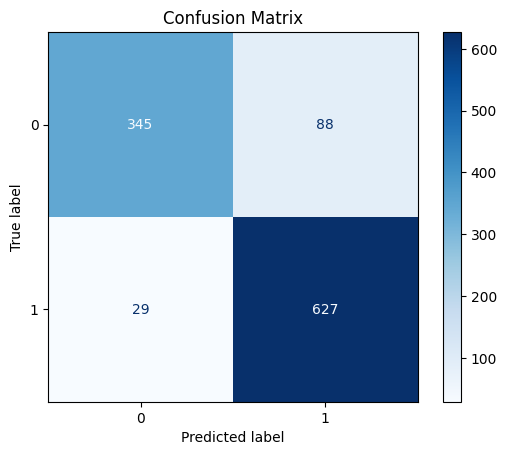

In [16]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf_tuned).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

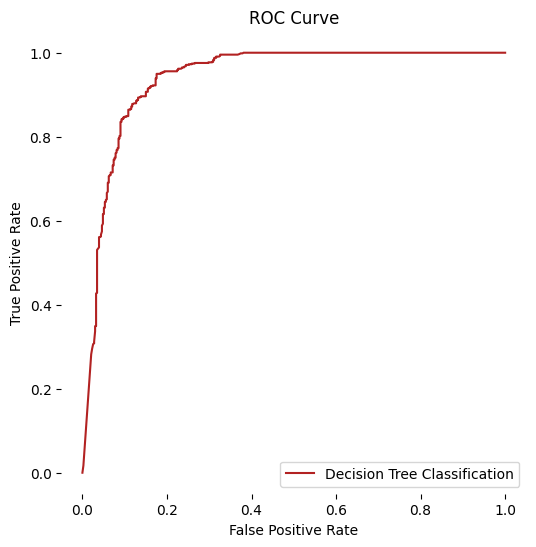

In [17]:
y_pred_probabiblity_rf_tuned = model_rf_tuned.predict_proba(X_test)[:,1]
fpr_tuned, tpr_tuned, thresholds_tuned = metrics.roc_curve(y_test,  y_pred_probabiblity_rf_tuned)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr_tuned, tpr_tuned, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

In [33]:
auc_tuned_random_forest = metrics.roc_auc_score(y_test,  y_pred_probabiblity_rf_tuned)
print(auc_tuned_random_forest)

0.940043584182955


For the random forest model the untuned model performed better than the tuned on with an accurancy score of 0.904 compared to 0.890. Also it had a higher recall score with 85% compared to 80% for the class dropout which we wanted to achieve. Also the AUC score is slightly higher with 94,6% compared to 94%.

A possible reason why the untuned random forest model performed better than the tuned one is that the hyperparameters are chosen based on the training data and not the testing data. Therefore, it can be the case that the model will perform better with the hyperparameters on the training data but perform worse than the untuned model on the testing data.

# 3. Decision Trees

### 3.1 Evaluation of Untuned Model

In [18]:
accuracy_model_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy_model_dt}')
print('Confusion Matrix:')
print(conf_matrix_dt)
print('Classification Report:')
print(class_report_dt)

Accuracy: 0.852157943067034
Confusion Matrix:
[[360  73]
 [ 88 568]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       433
           1       0.89      0.87      0.88       656

    accuracy                           0.85      1089
   macro avg       0.84      0.85      0.85      1089
weighted avg       0.85      0.85      0.85      1089



The precision for class 0 (Dropout) is 80%, but the recall is 83%. This means that students that have the risk of dropping out, 83% were correctly identified.

The precison for class 1 (Graduate) is 89%, but the recall is 87%. This means that students that do not have the the risk off dropping out, 87% were correctly identified. 

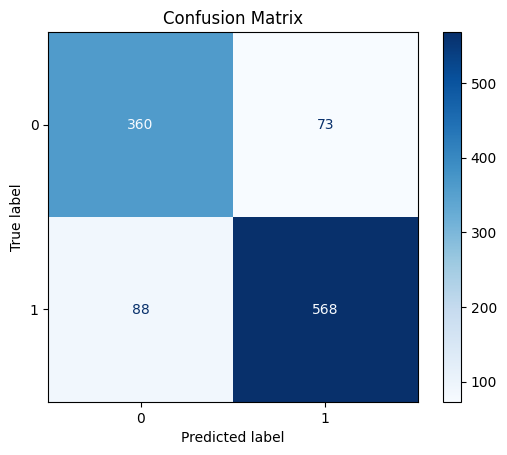

In [19]:
ConfusionMatrixDisplay(conf_matrix_dt, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

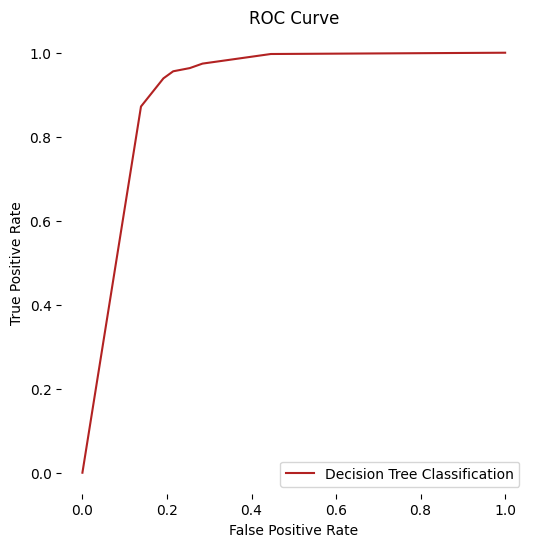

In [20]:
y_pred_probabiblity_dt = model_dt_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_dt)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

In [34]:
auc_untuned_decision_tree = metrics.roc_auc_score(y_test,  y_pred_probabiblity_dt)
print(auc_untuned_decision_tree)

0.9098990311496649


### 3.2 Evaluation of Tuned Model

In [21]:
accuracy_model_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
conf_matrix_model_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
class_report_model_dt_tuned = classification_report(y_test, y_pred_dt_tuned)

print(f'Accuracy: {accuracy_model_dt_tuned}')
print('Confusion Matrix:')
print(conf_matrix_model_dt_tuned)
print('Classification Report:')
print(class_report_model_dt_tuned)

Accuracy: 0.8879706152433425
Confusion Matrix:
[[340  93]
 [ 29 627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       433
           1       0.87      0.96      0.91       656

    accuracy                           0.89      1089
   macro avg       0.90      0.87      0.88      1089
weighted avg       0.89      0.89      0.89      1089



The precision for class 0 (Dropout) is 92%, but the recall is 79%. This means that students that have the risk of dropping out, 79% were correctly identified.

The precison for class 1 (Graduate) is 87%, but the recall is 96%. This means that students that do not have the the risk off dropping out, 96% were correctly identified. 

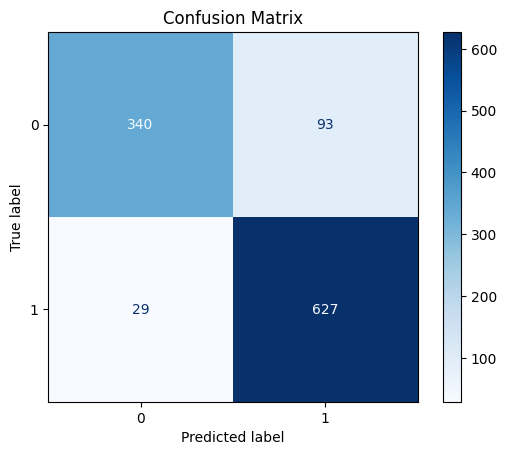

In [22]:
ConfusionMatrixDisplay(conf_matrix_model_dt_tuned, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

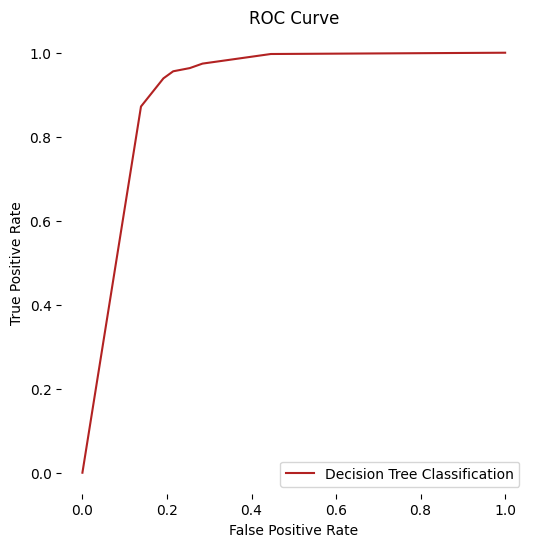

In [23]:
y_pred_probabiblity_dt_tuned = model_dt_tuned.predict_proba(X_test)[:,1]
fpr_tuned, tpr_tuned, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_dt_tuned)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr_tuned, tpr_tuned, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

In [35]:
auc_tuned_decision_tree = metrics.roc_auc_score(y_test,  y_pred_probabiblity_dt_tuned)
print(auc_tuned_decision_tree)

0.9098990311496649


The tuned decision tree model performed with an accurancy of 0.887 better than the untuned on with an accurancy score of 0.852. But it had a lower recall score. The AUC-Score is the same for both models.

# 4. Naive Bayes

In [24]:
accuracy_model_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_model_gb= confusion_matrix(y_test, y_pred_gb)
class_report_model_gb = classification_report(y_test, y_pred_gb)

print(f'Accuracy: {accuracy_model_gb}')
print('Confusion Matrix:')
print(conf_matrix_model_gb)
print('Classification Report:')
print(class_report_model_gb)

Accuracy: 0.8631772268135904
Confusion Matrix:
[[335  98]
 [ 51 605]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       433
           1       0.86      0.92      0.89       656

    accuracy                           0.86      1089
   macro avg       0.86      0.85      0.85      1089
weighted avg       0.86      0.86      0.86      1089



The precision for class 0 (Dropout) is 87%, but the recall is 77%. This means that students that have the risk of dropping out, 77% were correctly identified.

The precison for class 1 (Graduate) is 86%, but the recall is 92%. This means that students that do not have the the risk off dropping out, 92% were correctly identified. 

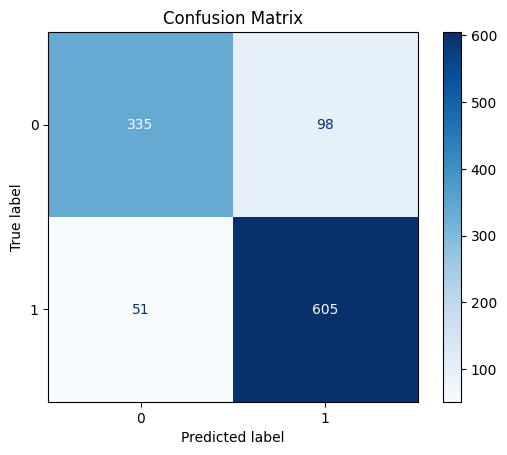

In [25]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_model_gb).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

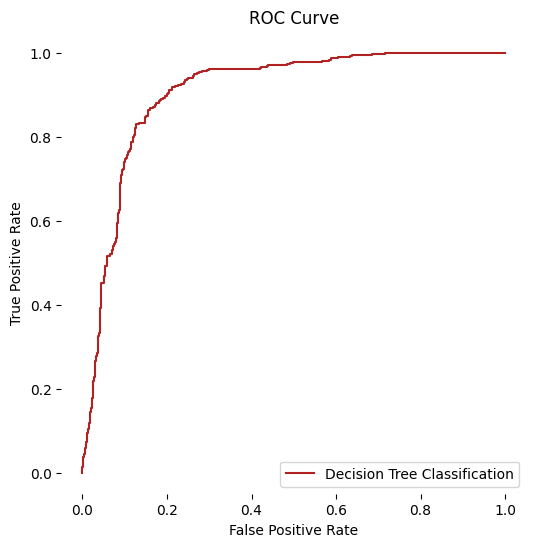

In [26]:
y_pred_probabiblity_gb = model_gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_gb)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

In [36]:
auc_naive_bayes = metrics.roc_auc_score(y_test,  y_pred_probabiblity_gb)
print(auc_naive_bayes)

0.9071670985185603


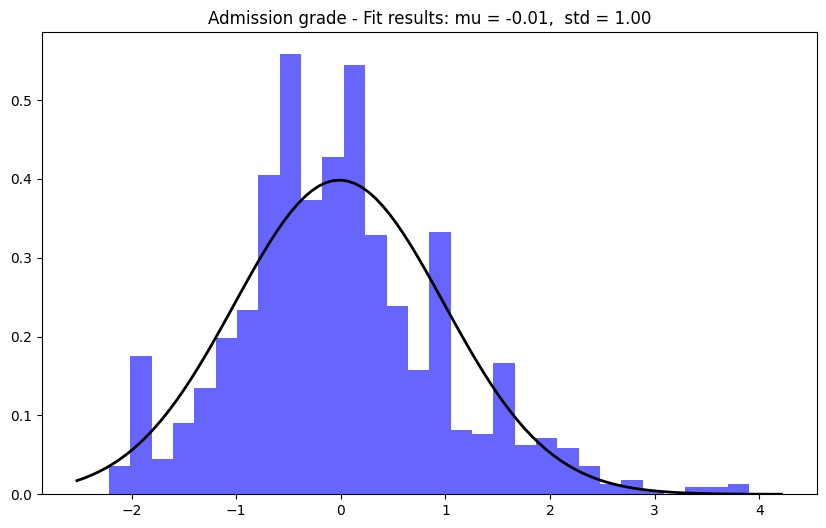

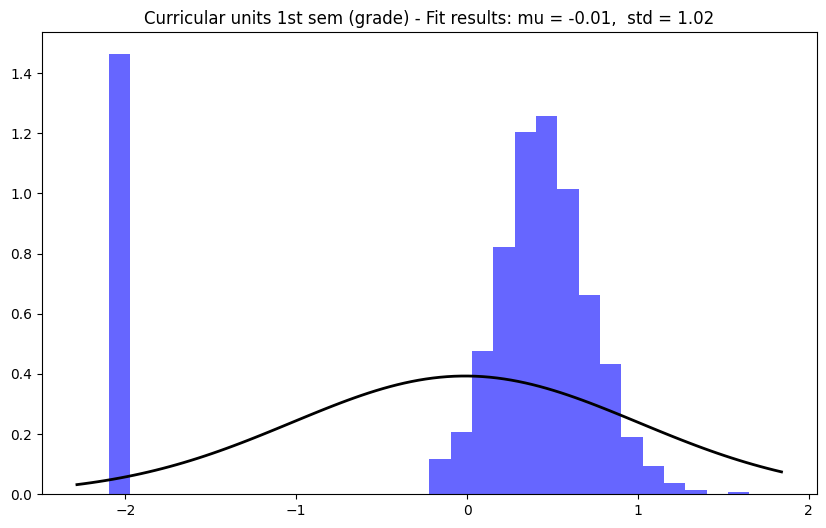

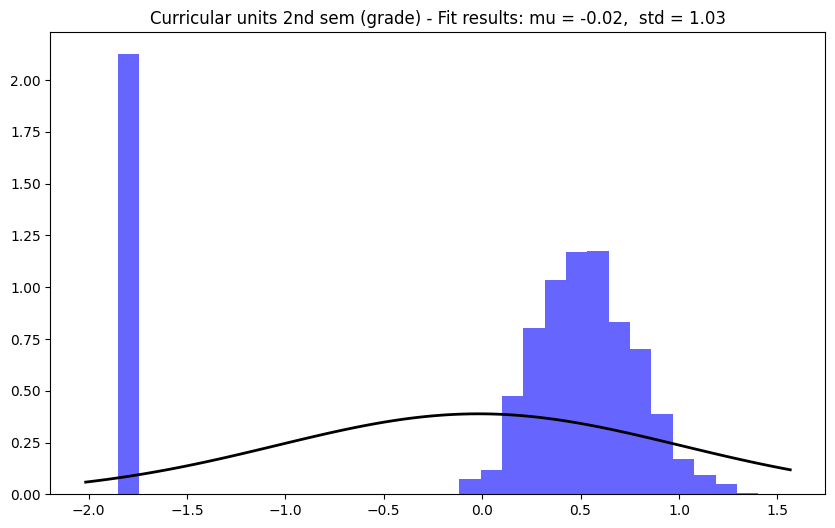

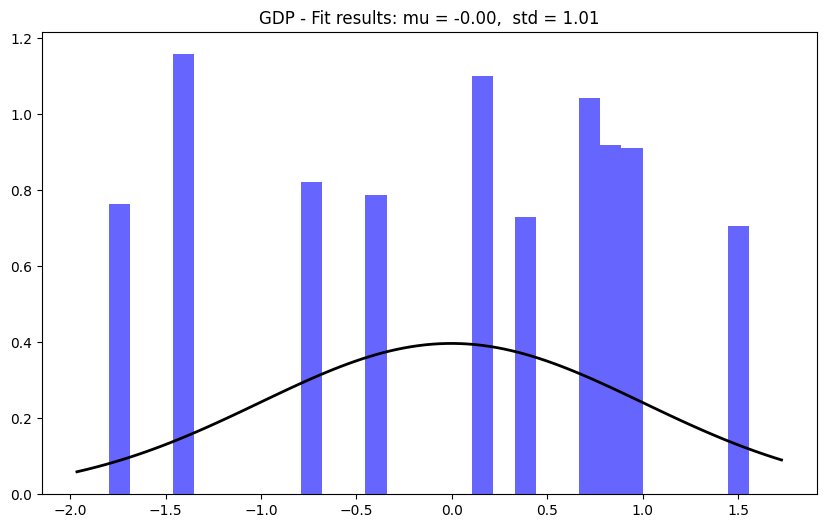

In [27]:
X = df_filtered.drop('Target', axis = 1)
X_test = pd.DataFrame(X_test, columns=X.columns)

continuous_features = ['Admission grade', 'Curricular units 1st sem (grade)', 
                       'Curricular units 2nd sem (grade)', 'GDP']

for feature in continuous_features:
    if feature in X_test.columns:
        feature_data = X_test[feature].dropna()
        
        plt.figure(figsize=(10, 6))
        plt.hist(feature_data, bins=30, density=True, alpha=0.6, color='b')
        
        mu, std = norm.fit(feature_data)
        
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)
        
        title = f"{feature} - Fit results: mu = {mu:.2f},  std = {std:.2f}"
        plt.title(title)
        
        plt.show()
    else:
        print(f"Feature {feature} not found in X_test columns.")


## 5. Result

To summarize the results from above, these are the ML models that performed the best. We will use the accruancy score for the evaluation since we want to choose the ML-Model with the best overall performance.

- kNN: tuned model with an accuracy of 88.6%
- Random Forest: untuned model with an accuracy of 90.4%
- Decision Tree: tuned model with an accuracy of 88.7%
- Naive Bayes: untuned model with an accurancy of 86.3%

As can be seen from the results above, all models performed well on the testing data as they all have an accuracy over 80%. The reason for this is that all the models we have chosen are suited to solve classification tasks. However, some models like Random Forest still performed better than others. The reasons for this and why some models performed worse will be explained in the following sections. 

Out of all the four models, Naive Bayes performed the worst with an accuracy of 86.3%. A possible reason for this is that we used Gaussian Naive Bayes for training. This model assumes that each feature is normally distributed and that the dataset consists of continuous variables. However, this is not entirely the case. As can be seen in the plots for the four continuous variables, only the distribution for the feature 'Admission grade' can be considered normally distributed. Also, the dataset contains numerically encoded categorical variables next to the continous variables. These are possible reasons why the model performed worse than the other models.

The Decision Tree and the kNN models' performance is almost the same, with accuracies of 88.7% and 88.6%, respectively. Possible reasons for this can be that both can handle categorical (if they are encoded) and numerical variables. Also, the dataset we used is of small/medium size. If the dataset were larger, the performance of the models would differ significantly. Then we could see which of these two models is better. Another possible reason for why they led to similar results is that all the features used for classification are relevant to the target variable, as the ones that were not needed were removed from the dataset. Both models can effectively capture the patterns and relationships within the data, which also leads to similar performance.

Random Forest is the model that performed the best on the dataset with an accuracy of 90.4%. Random Forest is an ensemble of Decision Trees. An ensemble allows error reduction, resulting in higher accuracy. The reason for this is that it is less likely to overfit than a Decision Tree because it combines the predictions of multiple Decision Trees, which reduces the variance of the model. Lower variance results in better generalization and thus leads to better performance on an unknown dataset. Decision Trees tend to have higher variance since there is a higher chance of overfitting because the tree can grow very complex. A complex tree might work well on the training data but perform worse on the testing data.

The five features that are most important for decision-making in the Random Forest model are:
- Curricular units 2nd semester (approved)
- Curricular units 1st semester (approved)
- Curricular units 2nd semester (grade)
- Curricular units 1st semester (grade)
- Tuition fees up to date

After evaluating, we have decided that the untuned Random Forest model is the model that performed best on the dataset due to the reasons listed above. Also it has the highest recall score out of all models for the class dropout which is what we wanted to achieve. Also it has the highest AUC-score with 0.947 which signifies that it has a good measure of separability and can distinguish between different classes efficiently. This is why this model has been saved in a pickle file. How an ML model can be saved can be seen in the next section.

## 6. Savig the best ML-Model

In [28]:
#import pickle
#pickle.dump(model_rf, open('predict-student-dropout-academic-success-model.pk1' , 'wb'))